In [14]:
# 妈妈杯问题B：甲骨文智能识别中原始拓片单字自动分割与识别研究 求解思路

In [9]:
# 针对问题一，我们对附件一的甲骨文图像数据进行数据预处理
# 包括但不限于：
# 尺寸调整：将图像调整为模型要求的输入尺寸，通常是正方形或者某个固定的长宽比。
# 归一化：将图像的像素值缩放到固定范围内，例如0,1或−1,1，以便于模型的训练。
# 数据增强：通过随机旋转、裁剪、翻转、变换亮度和对比度等方式来增加训练数据的多样性，从而提高模型的泛化能力。
# 图像增强：对图像进行增强操作，如调整亮度、对比度、锐度、颜色等，以增强图像的特征。

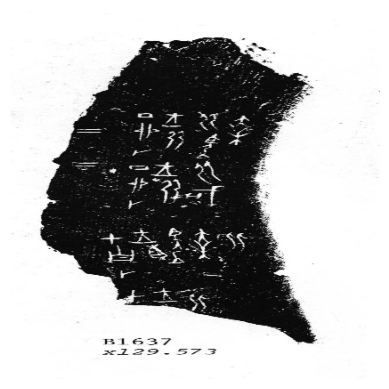

In [27]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

# 读取图像
image_path1 = r'data\1_Pre_test\h02060.jpg'
image_path2 = r'data\1_Pre_test\w01637.jpg'
image_path3 = r'data\1_Pre_test\w01870.jpg'
image1 = cv2.imread(image_path1)
image2 = cv2.imread(image_path2)
image3 = cv2.imread(image_path3)

# 定义目标尺寸
target_size = (416, 416)  # YOLOv5 推荐的尺寸

# 调整大小
resized_image1 = cv2.resize(image1, target_size)
resized_image2 = cv2.resize(image2, target_size)
resized_image3 = cv2.resize(image3, target_size)

# 将图像归一化为 [0, 1]
normalized_image = []
normalized_image.append(resized_image1.astype(np.float32) / 255.0)
normalized_image.append(resized_image2.astype(np.float32) / 255.0)
normalized_image.append(resized_image3.astype(np.float32) / 255.0)
# 如果需要旋转，可以在这里进行旋转操作

# 将图像转换为 PyTorch 的 Tensor 格式，并添加批次维度
tensor_image = torch.tensor(normalized_image[0]).permute(2, 0, 1).unsqueeze(0)

# 现在 tensor_image 就是你所需的输入数据，准备用于 YOLOv5 模型
plt.imshow(normalized_image[1])
plt.axis('off')
plt.show()

In [24]:
# 针对问题二，基于yolov5模型，利用附件2中的数据对模型进行微调，使其具备单字检测分割的能力。
# 我们将部分分割结果可视化，验证模型分割能力。

In [11]:
# 针对问题三，利用第二问得到的检测分割模型，在附件三测试集上对测试数据进行检测分割，并保存结果到附件Test_results.xlsx

In [12]:
# 针对问题四，附件四给出部分甲骨文图像及其对应的简体中文，我们建立inception_v3分类模型，通过训练数据对模型进行微调。
# 将得到的在甲骨文文字识别任务上微调后的inception_v3模型对测试集数据进行文字识别。
# 将识别结果保存，写入论文